# Sample Linear Regression Model for Housing

> [Scikit-Learn LRM Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
>
> [Scikit-Learn LRM API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
>
> [Scikit-Learn Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)
>

## Import Modules

In [1]:
import json
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", mpl.__version__)
print("sklearn:", skl.__version__)


numpy: 1.19.5
pandas: 1.1.5
matplotlib: 3.3.4
sklearn: 0.24.2


## Create training and test datasets

In [14]:
# Load the housing dataset
dsResults = datasets.fetch_california_housing(return_X_y=False)
print("housing_X.shape:", dsResults.data.shape)
print("housing_y.shape:", dsResults.target.shape)


housing_X.shape: (20640, 8)
housing_y.shape: (20640,)


In [15]:
print("feature_names:", dsResults.feature_names)
print("target_names:", dsResults.target_names)


feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target_names: ['MedHouseVal']


In [16]:
# display sample data
dsResults.data[:5,]


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [17]:
# display sample target data
dsResults.target[:5]


array([4.526, 3.585, 3.521, 3.413, 3.422])

In [18]:
# Use only one feature
housing_X = dsResults.data[:, np.newaxis, 2]
housing_X[:5,]


array([[6.98412698],
       [6.23813708],
       [8.28813559],
       [5.8173516 ],
       [6.28185328]])

In [28]:
# Split the data into training/testing sets
housing_X_train = housing_X[:-2000]
housing_X_test = housing_X[-2000:]

print("housing_X_train.shape:", housing_X_train.shape)
print("housing_X_test.shape:", housing_X_test.shape)


housing_X_train.shape: (18640, 1)
housing_X_test.shape: (2000, 1)


In [29]:
# Split the targets into training/testing sets
housing_y_train = dsResults.target[:-2000]
housing_y_test = dsResults.target[-2000:]

print("housing_y_train.shape:", housing_y_train.shape)
print("housing_y_test.shape:", housing_y_test.shape)


housing_y_train.shape: (18640,)
housing_y_test.shape: (2000,)


## Export test dataset

In [30]:
# create test data for exporting
df_from_arr = pd.DataFrame(pd.DataFrame(data=[housing_X_test[:,0], housing_y_test])).T
df_from_arr.rename({0: 'x', 1: 'y'}, axis='columns', inplace=True) 
df_from_arr.head(5)


,x,y
0,4.324194,2.158
1,4.535613,2.070
2,4.813212,2.346
3,4.426656,2.156
4,4.664345,2.519


In [31]:
# export test data
df_from_arr.to_json("testdata.json", orient="records", lines=True)


## Create linear model

In [32]:
# Create linear regression object
lrModel = linear_model.LinearRegression()


In [33]:
# Train the model using the training sets
lrModel.fit(housing_X_train, housing_y_train)


LinearRegression()

In [34]:
# Make predictions using the testing set
housing_y_pred = lrModel.predict(housing_X_test)
housing_y_pred


array([2.04572155, 2.06068037, 2.08032173, ..., 2.10808086, 2.11685229,
       2.11156015])

In [35]:
# The coefficients
print("Coefficients: \n", lrModel.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(housing_y_test, housing_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(housing_y_test, housing_y_pred))


Coefficients: 
 [0.07075437]
Mean squared error: 1.07
Coefficient of determination: -0.38


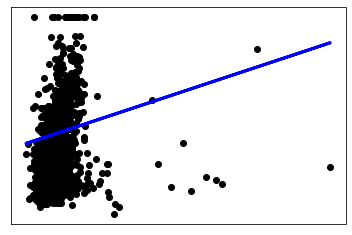

In [36]:
# Plot outputs
plt.scatter(housing_X_test, housing_y_test, color="black")
plt.plot(housing_X_test, housing_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# test prediction using equation + model parameters
print("coef:", lrModel.coef_[0])
print("intercept:", lrModel.intercept_)

x = -0.01159501
y = lrModel.coef_[0] * x + lrModel.intercept_
print("y =", y)


In [ ]:
# test prediction using model
lrModel.predict([[-0.01159501]])


## Save & Load ML Models

- https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
# save the model to disk (pickle format)
filename = 'lr_model.pkl'
pickle.dump(lrModel, open(filename, 'wb'))


In [ ]:
# load the model from disk (pickle format)
loadedModel = pickle.load(open(filename, 'rb'))


In [ ]:
# score diabetes test dataset against loadedModel
score = loadedModel.score(diabetes_X_test, diabetes_y_test)
print("Score:", score)


In [ ]:
# predict diabetes test dataset against loadedModel
loadedModel.predict(diabetes_X_test)


## Test: ModelOp.init

In [ ]:
#modelop.init
def begin():
    global model_artifact
    model_artifact = pickle.load(open("lr_model.pkl", "rb"))
    print("pass", flush=True)
    pass


In [ ]:
# init model
begin()


## Test: ModelOp.score

In [ ]:
#modelop.score
def action(datum):
    prediction = compute_prediction(datum)
    print("modelop.score.action:", prediction, flush=True)
    #yield prediction
    return prediction

def compute_prediction(datum):
    x = datum['x']
    prediction = model_artifact.predict(x)[0]
    return prediction


In [ ]:
action({"x":0.0778633876,"y":233.0})

## Test: Modelop.metrics

> [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)

> [Root Mean Square Error (RMSE)](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e)

In [ ]:
#modelop.metrics
def metrics(data):
    actuals = data.y.tolist()
    data = data.to_dict(orient='records')
    predictions = list(map(compute_prediction, data))
    diffs = [x[0] - x[1] for x in zip(actuals, predictions)]
    rmse = math.sqrt(sum(list(map(lambda x: x**2, diffs))) / len(diffs))
    mae = sum(list(map(abs, diffs))) / len(diffs)
    # yield dict(MAE=mae, RMSE=rmse)
    return dict(MAE=mae, RMSE=rmse)


In [ ]:
# load testdata.json into dataframe
df = pd.read_json("testdata.json", lines=True)
df.head()


In [ ]:
# dataframe to dictionary list
df_dict = df.to_dict(orient='records')
df_dict[:5]


In [ ]:
# get actual values
actuals = df.y.tolist()
actuals[:5]


In [ ]:
# get predictions from df_dict
predictions = list(map(compute_prediction, df_dict))
predictions[:5]


In [ ]:
# find MAE and RMSE metrics
diffs = [x[0] - x[1] for x in zip(actuals, predictions)]
rmse = math.sqrt(sum(list(map(lambda x: x**2, diffs))) / len(diffs))
mae = sum(list(map(abs, diffs))) / len(diffs)
dict(MAE=mae, RMSE=rmse)


In [ ]:
# get modelop metrics
data = pd.read_json("testdata.json", lines=True)
metrics(data)
    